In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# importing scripts
import sys
sys.path.append('..')
%reload_ext autoreload
%autoreload 2
from scripts import preprocessing_yellow

# Yellow cabs

Loading preprocessed dataframe, more information about the approach in processing this data can be found in the script

In [3]:
df = preprocessing_yellow.clean_yellow_taxi_df('../data', 2023, 1)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_time_min,PU_Borough,DO_Borough
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.0,8.433333,Manhattan,Manhattan
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.0,6.316667,Manhattan,Manhattan
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.0,12.750000,Manhattan,Manhattan
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.0,10.833333,Manhattan,Manhattan
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,0.5,10.00,0.0,1.0,27.80,2.5,0.0,12.300000,Manhattan,Manhattan


## Exploration

### Relationship between Time vs Distance

After completing the initial preprocessing of the data, we observed a few anomalous instances where we encountered short time durations paired with long distances traveled

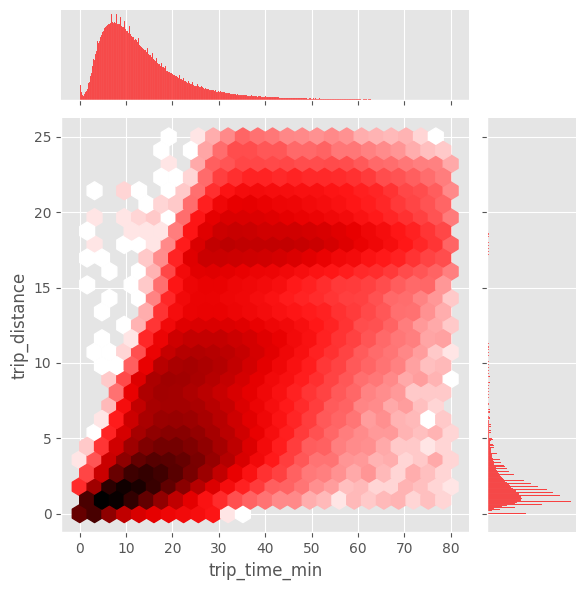

In [4]:
sns.jointplot(df, x='trip_time_min', y='trip_distance', kind="hex", color='red', ratio=4, joint_kws=dict(bins='log', gridsize=25))

### Analysis of Time vs Cost

The presence of outliers with unusually high costs in relation to time duration prompts investigation into whether these instances represent penalties or additional charges.

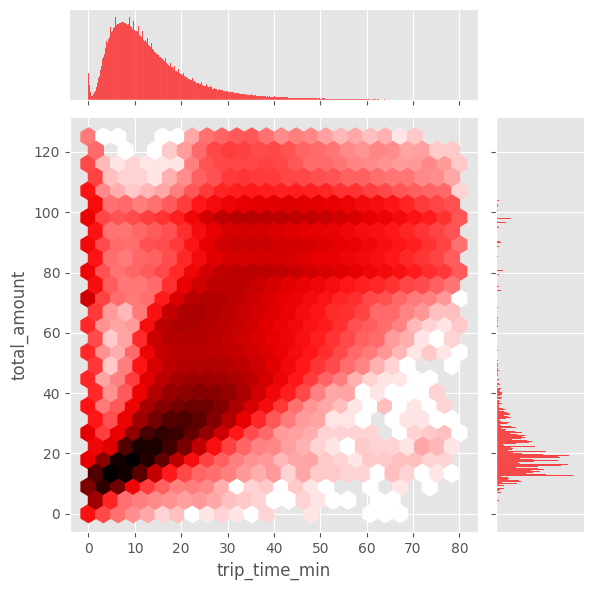

In [5]:
sns.jointplot(df, x='trip_time_min', y='total_amount', kind="hex", color='red', ratio=4, joint_kws=dict(bins='log', gridsize=25))

### Analysis of Trip Distance vs. Total Amount

Another interesting aspect of our analysis involves examining the relationship between trip distance and total amount charged. We have identified additional outliers that are characterized by short trips with unexpectedly high costs, as well as long trips with near-zero charges.

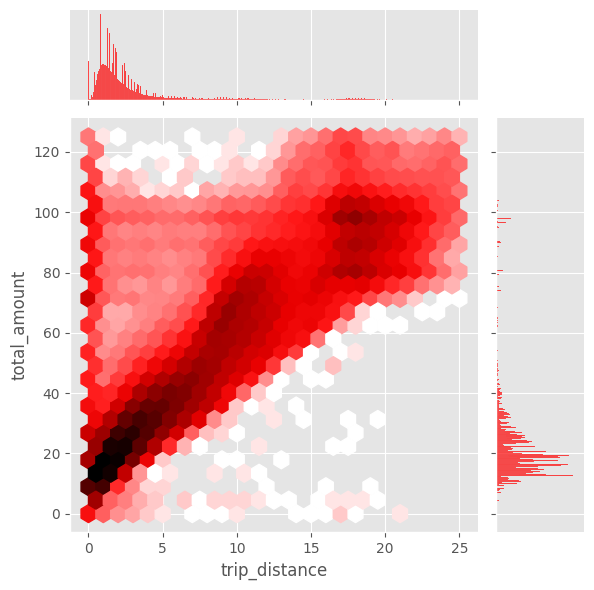

In [6]:
sns.jointplot(df, x='trip_distance', y='total_amount', kind="hex", color='red', ratio=4, joint_kws=dict(bins='log', gridsize=25))

In [7]:
with pd.option_context('display.max_columns', None):
    display(df.head(5))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_time_min,PU_Borough,DO_Borough
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,8.433333,Manhattan,Manhattan
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.00,0.0,1.0,16.90,2.5,0.0,6.316667,Manhattan,Manhattan
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.0,0.5,15.00,0.0,1.0,34.90,2.5,0.0,12.750000,Manhattan,Manhattan
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,10.833333,Manhattan,Manhattan
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.8,1.0,0.5,10.00,0.0,1.0,27.80,2.5,0.0,12.300000,Manhattan,Manhattan


## Where are people traveling

The primary operating area for NYC Yellow cabs is centered around Manhattan, with a significant number of passengers being picked up in Manhattan and transported to destinations outside or around the borough.

In [44]:
display(
    'Where are passengers picked up at?',
    df.groupby(['PU_Borough']).size().reset_index().rename(columns={0: 'value'}),
    'Where are passengers traveling to?',
    df.groupby(['DO_Borough']).size().reset_index().rename(columns={0: 'value'}),
)

'Where are passengers picked up at?'

,PU_Borough,value
0,Bronx,1297
1,Brooklyn,10461
2,EWR,184
3,Manhattan,2562476
4,Queens,260072
5,Staten Island,88


'Where are passengers traveling to?'

,DO_Borough,value
0,Bronx,14138
1,Brooklyn,104495
2,EWR,3589
3,Manhattan,2570734
4,Queens,141245
5,Staten Island,377


Pick up and destination by specific boroughs

In [43]:
df.groupby(['PU_Borough', 'DO_Borough']).size().reset_index().rename(columns={0: 'value'})

,PU_Borough,DO_Borough,value
0,Bronx,Bronx,873
1,Bronx,Brooklyn,15
2,Bronx,EWR,0
3,Bronx,Manhattan,349
4,Bronx,Queens,60
5,Bronx,Staten Island,0
6,Brooklyn,Bronx,22
7,Brooklyn,Brooklyn,5873
8,Brooklyn,EWR,11
9,Brooklyn,Manhattan,3894


## Number of trips by days of week

The distribution of the number of trips by day of the week in January reveals an interesting pattern, with Tuesday surpassing the anticipated higher demand on Fridays and Saturdays. I kind of assume that more people would be:

- willing to return home faster using taxi on weekend
- people are returning from parties on weekend

But mayby 4 day work is more popular in New York?

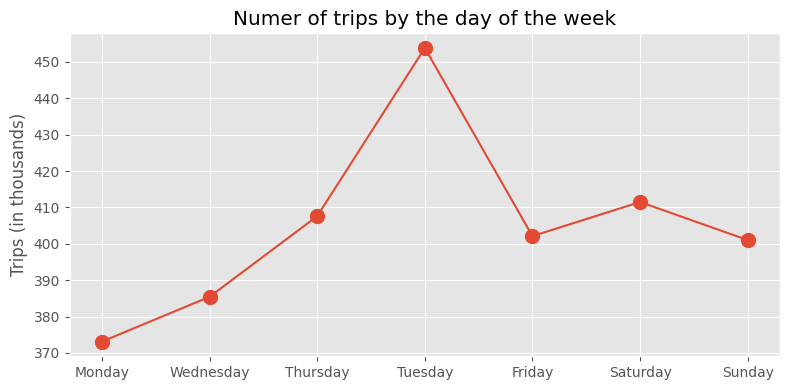

In [46]:
days_of_week = ['Monday', 'Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Saturday', 'Sunday']
x = df.groupby([df['tpep_pickup_datetime'].dt.day_name()]).size()[days_of_week]/1000

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, '-o', ms=10),  ax.set_ylabel('Trips (in thousands)')
ax.set_title('Numer of trips by the day of the week')
fig.tight_layout()

## Number of trips by hours

The analysis of the number of trips by hours aligns with expectations, showing an upward trend after 5 am as people start commuting to work, reaching a peak around 6 pm, and then gradually decreasing. This pattern reflects the typical rush hour traffic as individuals return home after work.

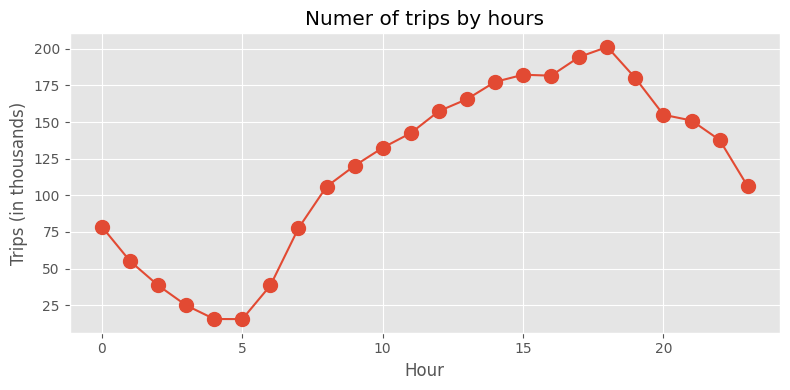

In [25]:
x = df.groupby([df['tpep_pickup_datetime'].dt.hour]).size()/1000

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, '-o', ms=10), ax.set_xlabel('Hour'), ax.set_ylabel('Trips (in thousands)')
ax.set_title('Numer of trips by hours')
fig.tight_layout()

## Number of trips depending on day and hour

Based on the data , several observations can be made:

- Saturdays and Sundays exhibit a higher number of early morning trips, potentially indicating people returning from late-night events or parties.
- Friday and Saturday nights show the highest frequency of late-night trips, likely corresponding to individuals heading out for social gatherings or nightlife activities.
- In contrast, Tuesday stands out with the highest number of trips during daytime hours, while travel activity on Saturdays and Sundays appears to be lower during daylight hours.

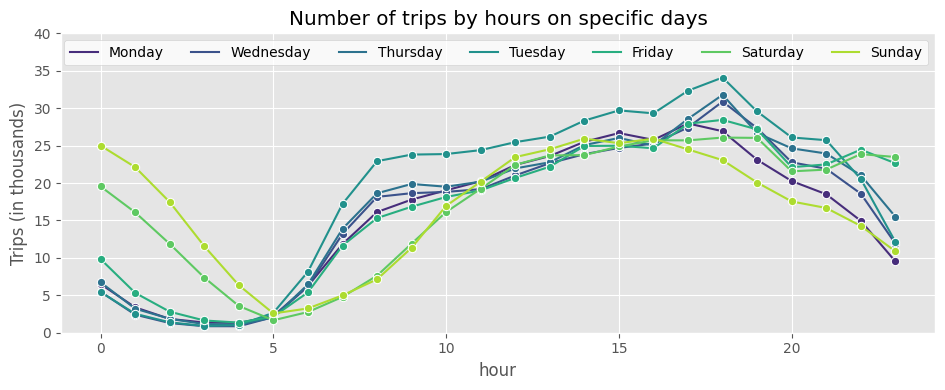

In [48]:
x = (
    df.groupby(
        [df['tpep_pickup_datetime'].dt.day_name(), df['tpep_pickup_datetime'].dt.hour]
    ).size()[days_of_week]
    .rename_axis(['day', 'hour']).reset_index().rename(columns={0: 'count'})
)
x['count'] = x['count']/1000

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(x, x='hour', y='count', hue='day', palette='viridis', marker='o')
plt.legend(ncol=7, facecolor='white'), ax.set_ylim((0, 40)), ax.set_ylabel('Trips (in thousands)')
ax.set_title('Number of trips by hours on specific days')
fig.tight_layout()

# Conclusions

- What are the main factors influencing the price of a trip? Or mayby we should find out in which areas clients are willing to give more or higher tips.
- Outliers in the relationship between the amount charged and the distance traveled could potentially be associated with late-night drives where intoxicated passengers caused damage to the taxi. (But how do we verify this)
- Predicting the expected number of taxi requests in a specific area and allocating appropriate resources could be enhanced by incorporating factors such as the day of the week and the time of day into the predictive models.

In [27]:
shapefile = gpd.read_file("../data/taxi_zones/taxi_zones.shp")
shapefile

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


# Green taxis

In [28]:
# df = pd.read_parquet('../data/green_tripdata_2023-01.parquet')